Log loss (logistic regression loss, cross-entropy loss)
===

* Se usa comunmente en regresión logística y redes neuronales artificiales.

* Para el caso binario con $y \in \{0, 1\}$ y $p=\text{Pr}(y=1)$ se define como el negativo de la función log-likelihood:

$$
L_\text{log}(y, p) = 
- \text{log} \text{ Pr}(y|p) =
-y \text{ log}(p) - (1-y)\text{ log}(1-p)
$$

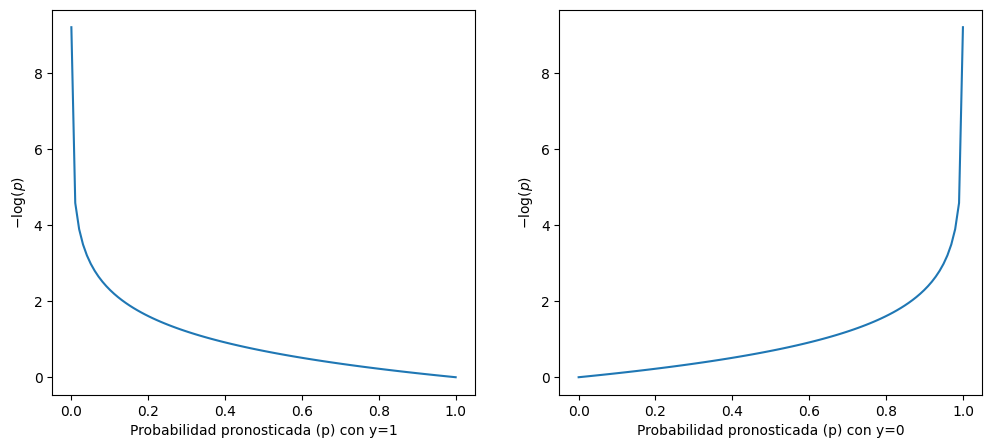

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def plot_entropy():

    x = np.linspace(0.0001, 0.9999, 100)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, -np.log(x))
    plt.xlabel("Probabilidad pronosticada (p) con y=1")
    plt.ylabel("$-\log(p)$")

    plt.subplot(1, 2, 2)
    plt.plot(x, -np.log(1 - x))
    plt.xlabel("Probabilidad pronosticada (p) con y=0")
    plt.ylabel("$-\log(p)$")

    plt.show()


plot_entropy()

In [2]:
from sklearn.metrics import log_loss

y_true = [0, 0, 1, 1]
y_pred = [[0.9, 0.1], [0.8, 0.2], [0.3, 0.7], [0.01, 0.99]]

#
# - 0 * log(0.1)  - (1 - 0) log(0.9)  = -log(0.9)
# - 0 * log(0.2)  - (1 - 0) log(0.8)  = -log(0.8)
# - 1 * log(0.7)  - (1 - 1) log(0.3)  = -log(0.7)
# - 1 * log(0.99) - (1 - 1) log(0.01) = -log(0.99)
# 
# (- log(0.9) - log(0.8) - log(0.7) - log(0.99)) / 4 = 0.1738073
#

In [3]:
log_loss(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_true,
    # -------------------------------------------------------------------------
    # Predicted probabilities, as returned by a classifier’s predict_proba
    # method
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # Log loss is undefined for p=0 or p=1, so probabilities are clipped to
    # max(eps, min(1 - eps, p))
    eps=1e-15,
    # -------------------------------------------------------------------------
    # If true, return the mean loss per sample. Otherwise, return the sum of
    # the per-sample losses.
    normalize=True,
    # -------------------------------------------------------------------------
    # Sample weights.
    sample_weight=None,
    # -------------------------------------------------------------------------
    # If not provided, labels will be inferred from y_true.
    labels=None,
)

0.1738073366910675

In [4]:
log_loss(
    y_true=["ham", "ham", "spam", "spam"],
    y_pred=y_pred,
    labels=["ham", "spam"]
)

0.1738073366910675

* Para multiples clases se generaliza de la siguiente forma: 

  * $Y$ es una matriz de indicadores binarios con $y_{i,k}=1$ si la $i$-ésima muestra tiene la etiqueta $k$ perteneciente a un conjunto de $K$ etiquedas. 
  
  * $P$ es la matriz de estimados de probabilidad con $p_{i,k}=\text{Pr}(y_{i,k}=1)$
  
$$
L_\text{log}(Y, P) = 
- \text{log} \text{ Pr}(Y|P) = 
- \frac{1}{N}
\sum_{i=0}^{N-1}
\sum_{k=0}^{K-1}
y_{i,k} \text{ log } p_{i,k}
$$